In [ ]:
''' In this notebook, Linear Regression on Food Crops_Commodities_2012_to_2015 is performed as a part of assignment.'''


## Importing important libraries

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder

In [170]:
df = pd.read_csv('Prices for Food Crops_Commodities_2012_to_2015.csv') # Reading the dataset
df.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


In [171]:
df.shape

(1145, 7)

## DATA FILTERING

Dropped unwanted columns

In [172]:
df.drop(columns = {'OBJECTID'},inplace=True)
df.tail()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM
1144,Roots & Tubers,Sweet Potatoes,Bag,98,KES3067.00,12/25/2015 12:00:00 AM


Renaming the Values_in_Ksh to Prices

In [173]:
df.rename(columns = {'Values_in_Ksh':'Prices'},inplace=True)
# df.rename(columns= {'Date':'Timestamp'},inplace=True)
df.columns

Index(['Produce_Variety', 'Commodity_Type', 'Unit', 'Volume_in_Kgs', 'Prices',
       'Date'],
      dtype='object')

In [174]:
df

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Prices,Date
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM
...,...,...,...,...,...,...
1140,Legumes,Groundnuts,Bag,110,KES12986.00,12/25/2015 12:00:00 AM
1141,Roots & Tubers,Red Irish Potatoes,Bag,110,KES2805.00,12/25/2015 12:00:00 AM
1142,Roots & Tubers,White Irish Potatoes,Bag,110,KES2885.00,12/25/2015 12:00:00 AM
1143,Roots & Tubers,Cassava Fresh,Bag,99,KES2097.00,12/25/2015 12:00:00 AM


In [197]:
df['Prices'] = df['Prices'].replace(r'[KES]','',regex=True).astype(float) # removing text from the price columns

Checking for null values

In [198]:
df.isna().sum()

,0
Produce_Variety,0
Commodity_Type,0
Unit,0
Volume_in_Kgs,0
Prices,2
Date,0
produce_variety,0
Type_of_commodity,0
Type_of_Package,0
Weight(kgs),0


Filling the NaN values with the average values

In [199]:
df['Prices']=df['Prices'].fillna((df['Prices'].mean()))
df.isna().sum()


,0
Produce_Variety,0
Commodity_Type,0
Unit,0
Volume_in_Kgs,0
Prices,0
Date,0
produce_variety,0
Type_of_commodity,0
Type_of_Package,0
Weight(kgs),0


In [200]:
df.describe()

,Volume_in_Kgs,Prices,Date,produce_variety,Type_of_commodity,Type_of_Package,Weight(kgs),Day,Month,Year
count,1145.000000,1145.000000,1145,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,73.370306,3188.371829,2013-11-07 00:07:32.751091712,1.251528,20.024454,1.233188,73.370306,2.886463,6.148472,2013.417467
min,13.000000,443.000000,2012-01-01 00:00:00,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,2012.000000
25%,50.000000,1720.000000,2013-01-01 00:00:00,1.000000,10.000000,0.000000,50.000000,1.000000,3.000000,2013.000000
50%,90.000000,2610.000000,2013-08-01 00:00:00,1.000000,21.000000,0.000000,90.000000,1.000000,6.000000,2013.000000
75%,95.000000,3776.000000,2015-03-01 00:00:00,2.000000,30.000000,2.000000,95.000000,1.000000,9.000000,2015.000000
max,142.000000,13713.000000,2015-12-25 00:00:00,3.000000,40.000000,7.000000,142.000000,25.000000,12.000000,2015.000000
std,36.564162,2376.371660,NaN,0.752362,11.773552,2.114043,36.564162,6.461643,3.401301,1.176864


Removing Duplicate rows

In [201]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## FEATURE ENGINEERING



Converting categorical data into numerical data

In [202]:
encoder = OrdinalEncoder()
df['produce_variety'] =encoder.fit_transform(df[['Produce_Variety']]).astype(int)
df['Type_of_commodity'] =encoder.fit_transform(df[['Commodity_Type']]).astype(int)
df['Type_of_Package'] = encoder.fit_transform(df[['Unit']]).astype(int)

df['Weight(kgs)'] = df['Volume_in_Kgs']
df.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Prices,Date,produce_variety,Type_of_commodity,Type_of_Package,Weight(kgs),Day,Month,Year
0,Horticulture,Cabbages,Ext Bag,126,2205.0,2012-01-01,1,5,2,126,1,1,2012
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,2012-01-01,1,11,4,22,1,1,2012
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,2012-01-01,1,34,4,14,1,1,2012
3,Horticulture,Carrots,Ext Bag,138,2833.0,2012-01-01,1,7,2,138,1,1,2012
4,Horticulture,Tomatoes,Lg Box,64,3411.0,2012-01-01,1,38,3,64,1,1,2012


In [203]:
df.Date = pd.to_datetime(df['Date'])

Separating date in month,day,year

In [204]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Prices,Date,produce_variety,Type_of_commodity,Type_of_Package,Weight(kgs),Day,Month,Year
0,Horticulture,Cabbages,Ext Bag,126,2205.0,2012-01-01,1,5,2,126,1,1,2012
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,2012-01-01,1,11,4,22,1,1,2012
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,2012-01-01,1,34,4,14,1,1,2012
3,Horticulture,Carrots,Ext Bag,138,2833.0,2012-01-01,1,7,2,138,1,1,2012
4,Horticulture,Tomatoes,Lg Box,64,3411.0,2012-01-01,1,38,3,64,1,1,2012


In [205]:
df.dtypes

,0
Produce_Variety,object
Commodity_Type,object
Unit,object
Volume_in_Kgs,int64
Prices,float64
Date,datetime64[ns]
produce_variety,int64
Type_of_commodity,int64
Type_of_Package,int64
Weight(kgs),int64


## DATA VISUALIZATION

## Visualizing the Commodity Price with different commodities

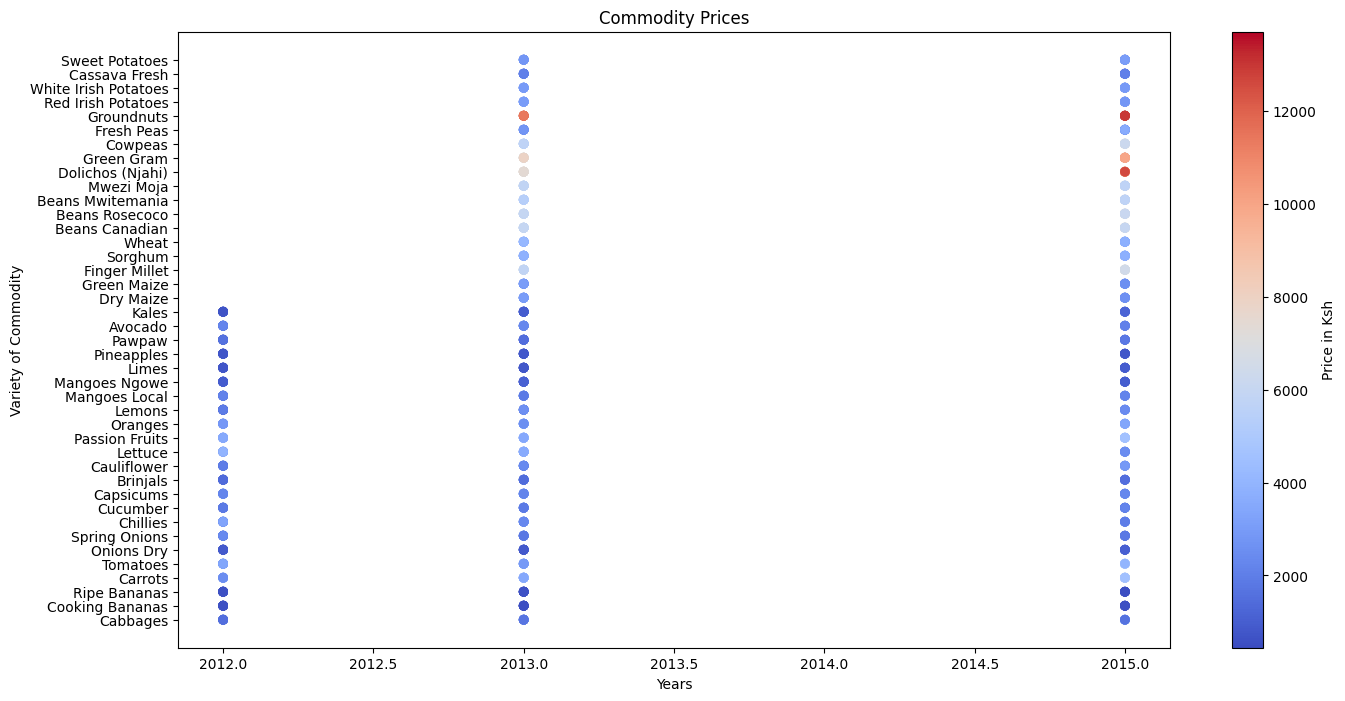

In [206]:
plt.figure(figsize=(16,8))
plt.scatter(df['Year'],df['Commodity_Type'],c=df['Prices'],cmap='coolwarm')
plt.colorbar().set_label('Price in Ksh')
plt.title('Commodity Prices')
plt.ylabel('Variety of Commodity')
plt.xlabel('Years')
plt.show()

Visualization of average price distribution of commoditiy

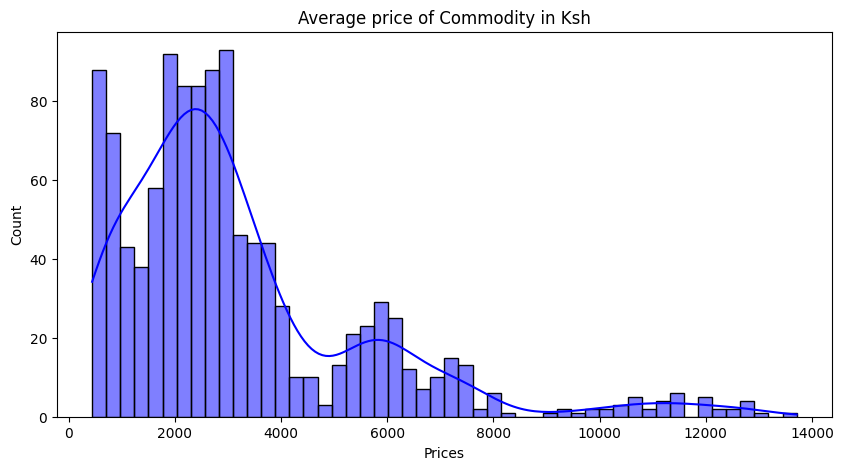

In [207]:
plt.figure(figsize=(10,5))
sns.histplot(df.Prices,bins=50,color='blue',kde=True)
plt.title('Average price of Commodity in Ksh')
plt.show()

In [208]:
mean_price=df['Prices'].mean()
median_price=df['Prices'].median()
print('The mean commodity Price is Ksh',round(mean_price))
print('The median commodity Price is Ksh',median_price)

The mean commodity Price is Ksh 3188
The median commodity Price is Ksh 2610.0


Determining the correlation between each numeric features is an important step for performing regression task in it.

In [209]:
Correlation = df[['produce_variety','Type_of_commodity','Type_of_Package','Weight(kgs)','Day','Month','Year','Prices']].corr()
Correlation

,produce_variety,Type_of_commodity,Type_of_Package,Weight(kgs),Day,Month,Year,Prices
produce_variety,1.000000,-0.033852,-0.221569,0.205566,0.161232,0.034582,0.165628,0.292545
Type_of_commodity,-0.033852,1.000000,0.117949,-0.055400,-0.006122,-0.001313,-0.006289,-0.172771
Type_of_Package,-0.221569,0.117949,1.000000,-0.555234,-0.155093,-0.033266,-0.159322,-0.411439
Weight(kgs),0.205566,-0.055400,-0.555234,1.000000,0.160867,0.034504,0.165253,0.418381
Day,0.161232,-0.006122,-0.155093,0.160867,1.000000,0.330882,0.392926,0.259159
Month,0.034582,-0.001313,-0.033266,0.034504,0.330882,1.000000,-0.139098,0.045978
Year,0.165628,-0.006289,-0.159322,0.165253,0.392926,-0.139098,1.000000,0.299783
Prices,0.292545,-0.172771,-0.411439,0.418381,0.259159,0.045978,0.299783,1.000000


Demonstrating correlation among features

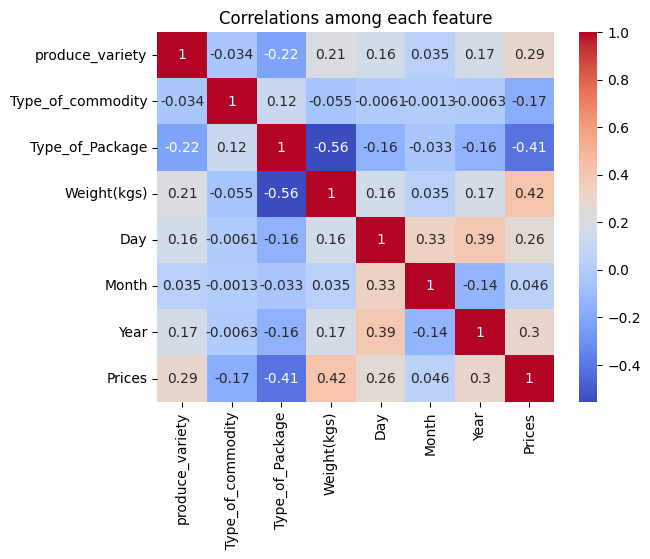

In [210]:
sns.heatmap(Correlation,cmap ='coolwarm',annot=True)
plt.title('Correlations among each feature')
plt.show()

Plotting the bar plots for dataset categories

In [211]:
df_cat = df[['Produce_Variety','Commodity_Type','Unit','Volume_in_Kgs','Day','Month','Year']]

Graph for Produce_Variety: total = 4


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


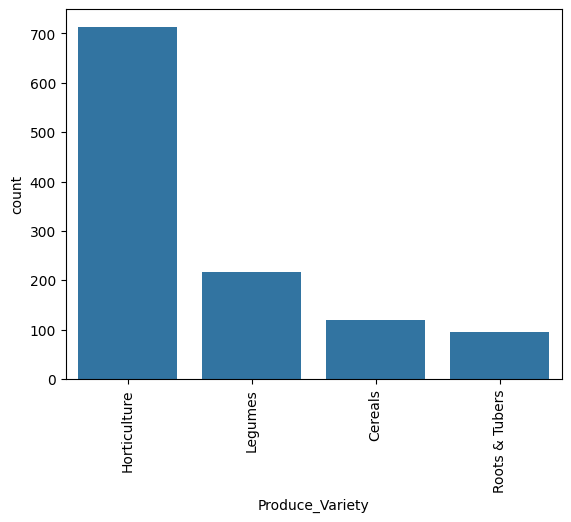

Graph for Commodity_Type: total = 41


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


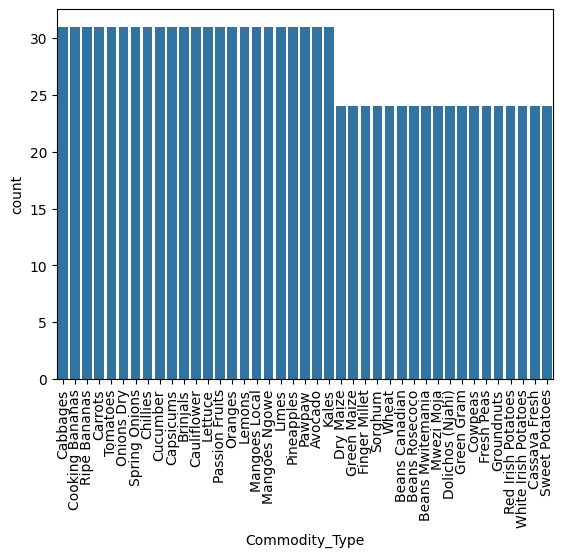

Graph for Unit: total = 8


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


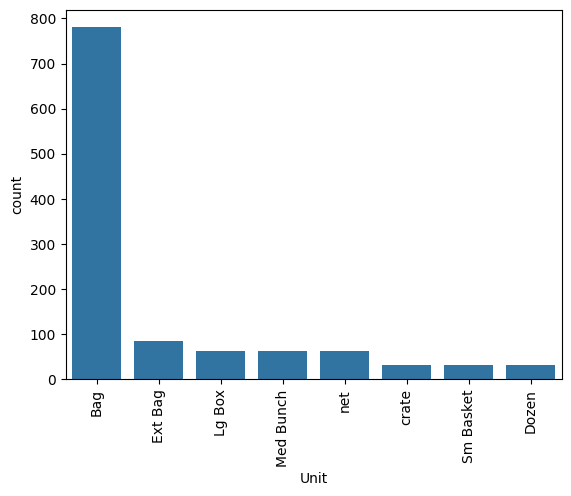

Graph for Volume_in_Kgs: total = 22


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


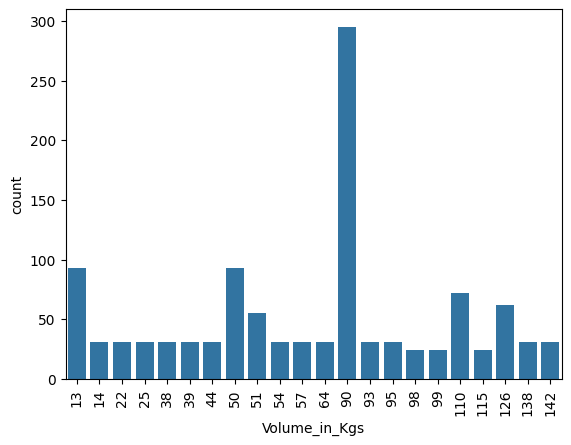

/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Graph for Day: total = 2


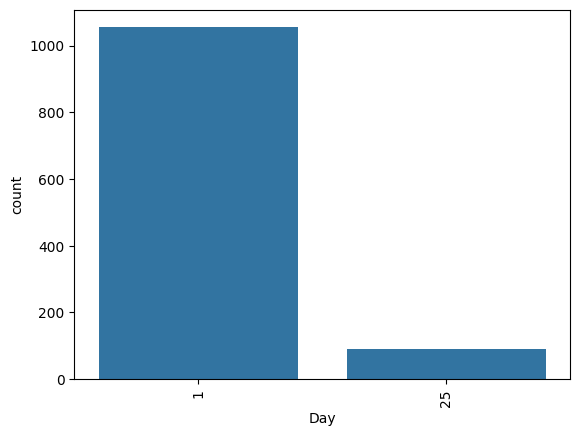

Graph for Month: total = 12


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


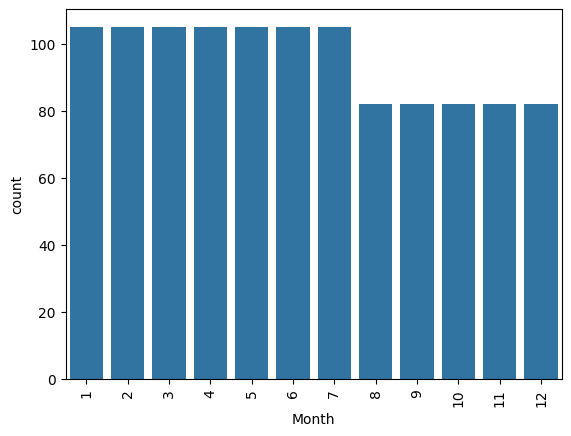

Graph for Year: total = 3


/tmp/ipython-input-977654329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


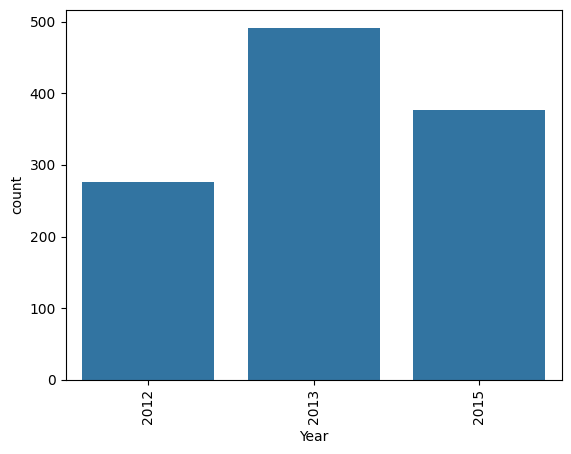

In [212]:
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print(f'Graph for {i}: total = {len(cat_num)}')
  chart = sns.barplot(x=cat_num.index,y =cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

# Linear Regression Implementation

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [214]:
data_model = df[['produce_variety','Type_of_commodity','Type_of_Package','Weight(kgs)','Day','Month','Year','Prices']]

In [215]:
data_dum = pd.get_dummies(data_model)

Train Test Split

In [216]:
X = data_dum.drop('Prices',axis=1)
y = data_dum['Prices']

In [217]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

MODEL FITTED

In [218]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [219]:
test_pred = model.predict(X_test)
test_train = model.predict(X_train)
residuals = test_pred - y_test
residuals

,Prices
583,1254.712420
726,-6678.629394
171,1209.881959
189,-741.756429
741,-3571.494737
...,...
971,-1963.979346
47,746.673891
130,1258.376489
573,1775.115965


##MODEL EVALUATION

MAE on train data

In [220]:
mse = metrics.mean_squared_error(y_train,test_train)
mae = metrics.mean_absolute_error(y_train,test_train)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 1384.4266395449351
MSE: 3694791.4972697864


MSE on test data

In [221]:
mse_test = metrics.mean_squared_error(y_test,test_pred)
mae_test = metrics.mean_absolute_error(y_test,test_pred)
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')


MAE: 1514.7154187220692
MSE: 4197566.05216349


In [222]:
r2score = metrics.r2_score(y_test,test_pred)

print(f'R2_SCORE: {r2score}')

R2_SCORE: 0.31521780443109026
